In [3]:
%load_ext autoreload
%autoreload 2

#standard imports
import numpy as np
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
sys.path.append("..")

#rl book imports
import rl
from rl.markov_decision_process import MarkovDecisionProcess
from rl.markov_process import State, MarkovProcess, NonTerminal, Terminal

from typing import (Callable, Dict, Generic, Iterator, Iterable, List,
                    Mapping, Optional, Sequence, Tuple, TypeVar, overload)


from rl.distribution import Categorical, Distribution, Constant, Choose
from rl.policy import Policy
from rl.monte_carlo import epsilon_greedy_policy, greedy_policy_from_qvf, glie_mc_control, mc_prediction
from rl.function_approx import LinearFunctionApprox, AdamGradient
from rl.td import glie_sarsa, q_learning
from rl.td_lambda import td_lambda_prediction


#custom imports 
import utils as u
import data as dat
import mdp_agent as ag
import baseline_policies as bp
import q_plots as qp
import backtest as btest
import v_predictor as v_true
import v_convergence as v_conv 
import v_plots2 as v2
import pickle
import SignalExtractor as signal

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [85]:
with open("pred_1.pkl","rb") as f:
    pred1 = pickle.load(f)

<AxesSubplot:>

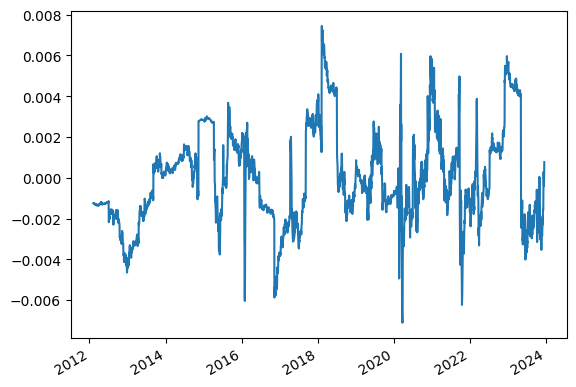

In [89]:
pred1["JPY"].plot()

# Data

In [20]:
with open("FX_Residuals/residuals_PCA_3F_6_2.pkl","rb") as f:
    fx_data = pickle.load(f)

In [81]:
all_preds = []

for ccy in fx_data.columns:

    print(f"starting {ccy}")

    data_ccy = (1+fx_data[[ccy]]).cumprod()

    roll = signal.RollingMeanRevPrediction(data_ccy,
                                lookback = 60,
                                length_epsiode = 300,
                                num_iter = 1000,
                                refit_freq = 100,
                                min_obs = 400)
    roll.fit_rolling()
    #rets = u.quick_backtest(data_ccy,roll.prediction)
    #print(np.sqrt(252)*np.mean(rets)/np.std(rets))
    #rets.cumsum().plot()
    #plt.show()
    #print(f"finished {ccy}")
    #all_rets.append(rets)
    pred_ccy = roll.prediction.copy()
    pred_ccy.columns = [ccy]
    all_preds.append(pred_ccy)

with open("pred_1.pkl","wb") as f:
    pickle.dump(pd.concat(all_preds,axis=1),f)

starting SGD
starting JPY
starting INR
starting THB


/Users/mehdi/Desktop/cme241/RL_Project/SignalExtractor.py:82: RuntimeWarning: invalid value encountered in scalar divide
  return (x.state["Spot"] - x.state["mu_t"])/(x.state["sigma_t"])
/Users/mehdi/Desktop/cme241/RL_Project/SignalExtractor.py:82: RuntimeWarning: invalid value encountered in scalar divide
  return (x.state["Spot"] - x.state["mu_t"])/(x.state["sigma_t"])
/Users/mehdi/Desktop/cme241/RL_Project/SignalExtractor.py:82: RuntimeWarning: invalid value encountered in scalar divide
  return (x.state["Spot"] - x.state["mu_t"])/(x.state["sigma_t"])
/Users/mehdi/Desktop/cme241/RL_Project/SignalExtractor.py:82: RuntimeWarning: invalid value encountered in scalar divide
  return (x.state["Spot"] - x.state["mu_t"])/(x.state["sigma_t"])
/Users/mehdi/Desktop/cme241/RL_Project/SignalExtractor.py:82: RuntimeWarning: invalid value encountered in scalar divide
  return (x.state["Spot"] - x.state["mu_t"])/(x.state["sigma_t"])
/Users/mehdi/Desktop/cme241/RL_Project/SignalExtractor.py:82: Run

starting ZAR
starting IDR
starting TWD
starting KRW
starting HUF
starting CHF
starting MYR


/Users/mehdi/Desktop/cme241/RL_Project/SignalExtractor.py:82: RuntimeWarning: invalid value encountered in scalar divide
  return (x.state["Spot"] - x.state["mu_t"])/(x.state["sigma_t"])
/Users/mehdi/Desktop/cme241/RL_Project/SignalExtractor.py:82: RuntimeWarning: invalid value encountered in scalar divide
  return (x.state["Spot"] - x.state["mu_t"])/(x.state["sigma_t"])
/Users/mehdi/Desktop/cme241/RL_Project/SignalExtractor.py:82: RuntimeWarning: invalid value encountered in scalar divide
  return (x.state["Spot"] - x.state["mu_t"])/(x.state["sigma_t"])
/Users/mehdi/Desktop/cme241/RL_Project/SignalExtractor.py:82: RuntimeWarning: invalid value encountered in scalar divide
  return (x.state["Spot"] - x.state["mu_t"])/(x.state["sigma_t"])
/Users/mehdi/Desktop/cme241/RL_Project/SignalExtractor.py:82: RuntimeWarning: invalid value encountered in scalar divide
  return (x.state["Spot"] - x.state["mu_t"])/(x.state["sigma_t"])
/Users/mehdi/Desktop/cme241/RL_Project/SignalExtractor.py:82: Run

starting PHP
starting BRL
starting MXN
starting COP
starting CLP
starting CAD
starting EUR
starting GBP
starting AUD
starting NZD
starting NOK
starting SEK
starting CZK


starting SGD
return   -0.109506
dtype: float64


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


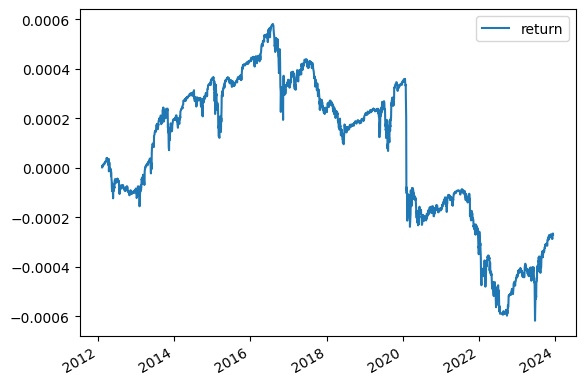

finished SGD
starting JPY
return   -0.394564
dtype: float64


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


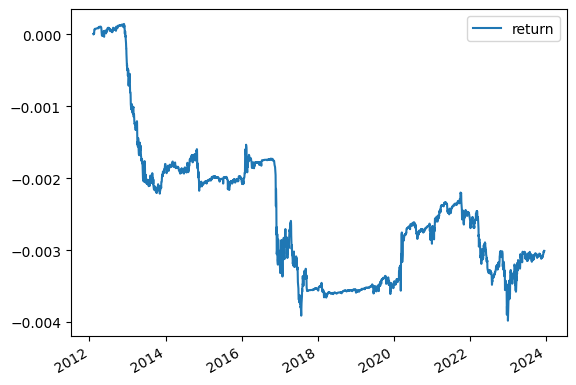

finished JPY
starting INR
return    0.061861
dtype: float64


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


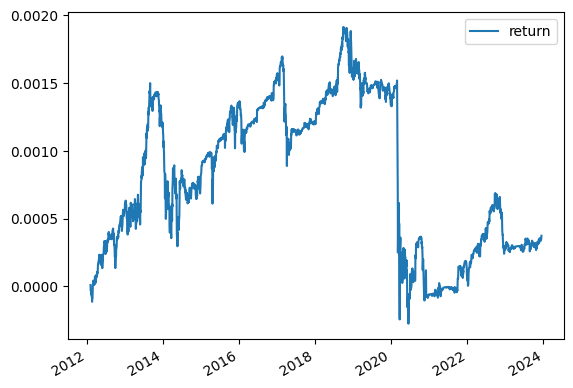

finished INR
starting THB


/Users/mehdi/Desktop/cme241/RL_Project/SignalExtractor.py:82: RuntimeWarning: invalid value encountered in scalar divide
  return (x.state["Spot"] - x.state["mu_t"])/(x.state["sigma_t"])
/Users/mehdi/Desktop/cme241/RL_Project/SignalExtractor.py:82: RuntimeWarning: invalid value encountered in scalar divide
  return (x.state["Spot"] - x.state["mu_t"])/(x.state["sigma_t"])
/Users/mehdi/Desktop/cme241/RL_Project/SignalExtractor.py:82: RuntimeWarning: invalid value encountered in scalar divide
  return (x.state["Spot"] - x.state["mu_t"])/(x.state["sigma_t"])
/Users/mehdi/Desktop/cme241/RL_Project/SignalExtractor.py:82: RuntimeWarning: invalid value encountered in scalar divide
  return (x.state["Spot"] - x.state["mu_t"])/(x.state["sigma_t"])
/Users/mehdi/Desktop/cme241/RL_Project/SignalExtractor.py:82: RuntimeWarning: invalid value encountered in scalar divide
  return (x.state["Spot"] - x.state["mu_t"])/(x.state["sigma_t"])
/Users/mehdi/Desktop/cme241/RL_Project/SignalExtractor.py:82: Run

return    0.172731
dtype: float64


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


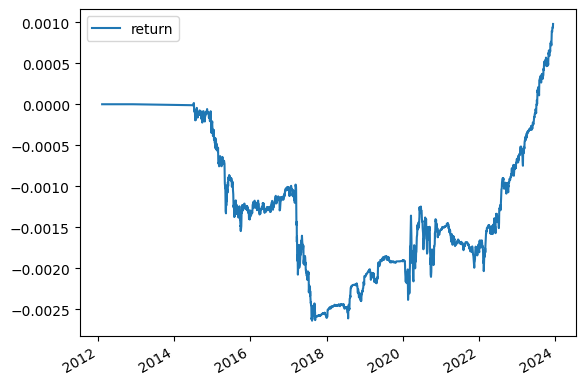

finished THB
starting ZAR
return    0.216271
dtype: float64


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


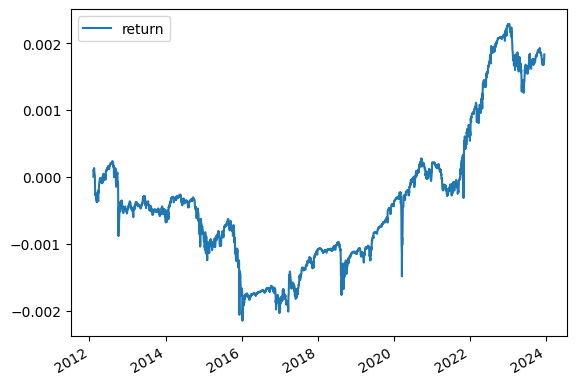

finished ZAR
starting IDR
return   -0.072145
dtype: float64


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


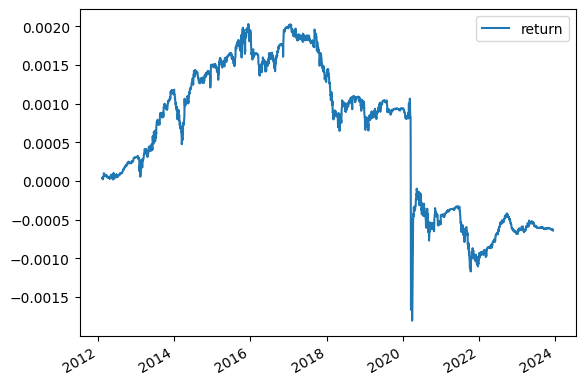

finished IDR
starting TWD
return   -0.08975
dtype: float64


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


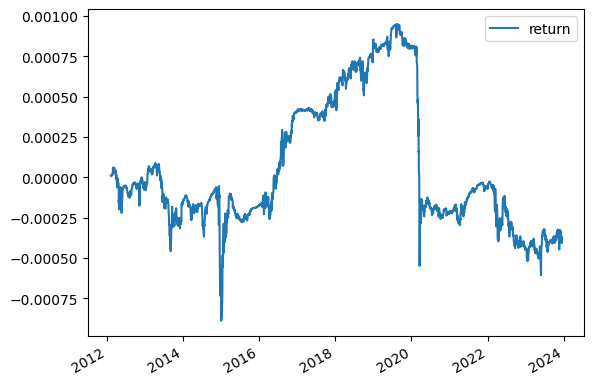

finished TWD
starting KRW
return   -0.312451
dtype: float64


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


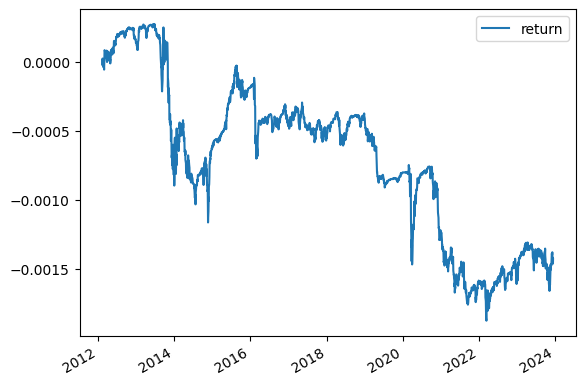

finished KRW
starting HUF
return    0.561811
dtype: float64


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


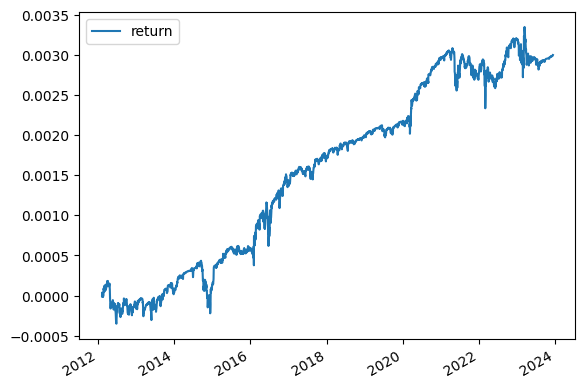

finished HUF
starting CHF
return   -0.0443
dtype: float64


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


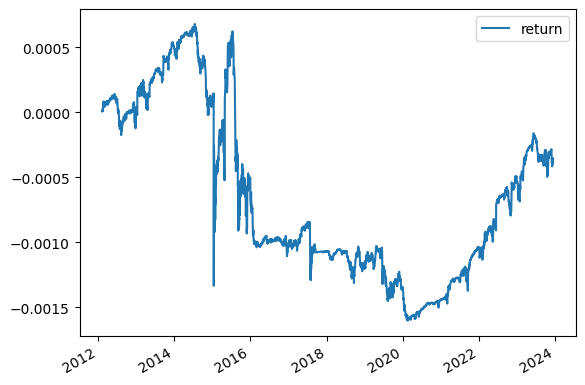

finished CHF
starting MYR


/Users/mehdi/Desktop/cme241/RL_Project/SignalExtractor.py:82: RuntimeWarning: invalid value encountered in scalar divide
  return (x.state["Spot"] - x.state["mu_t"])/(x.state["sigma_t"])
/Users/mehdi/Desktop/cme241/RL_Project/SignalExtractor.py:82: RuntimeWarning: invalid value encountered in scalar divide
  return (x.state["Spot"] - x.state["mu_t"])/(x.state["sigma_t"])
/Users/mehdi/Desktop/cme241/RL_Project/SignalExtractor.py:82: RuntimeWarning: invalid value encountered in scalar divide
  return (x.state["Spot"] - x.state["mu_t"])/(x.state["sigma_t"])
/Users/mehdi/Desktop/cme241/RL_Project/SignalExtractor.py:82: RuntimeWarning: invalid value encountered in scalar divide
  return (x.state["Spot"] - x.state["mu_t"])/(x.state["sigma_t"])
/Users/mehdi/Desktop/cme241/RL_Project/SignalExtractor.py:82: RuntimeWarning: invalid value encountered in scalar divide
  return (x.state["Spot"] - x.state["mu_t"])/(x.state["sigma_t"])
/Users/mehdi/Desktop/cme241/RL_Project/SignalExtractor.py:82: Run

return   -0.367584
dtype: float64


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


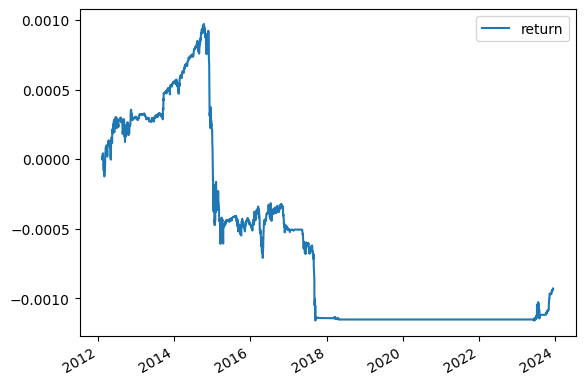

finished MYR
starting PHP
return    0.30457
dtype: float64


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


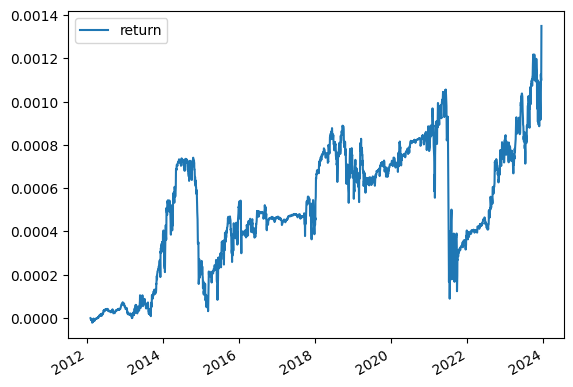

finished PHP
starting BRL
return   -0.074463
dtype: float64


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


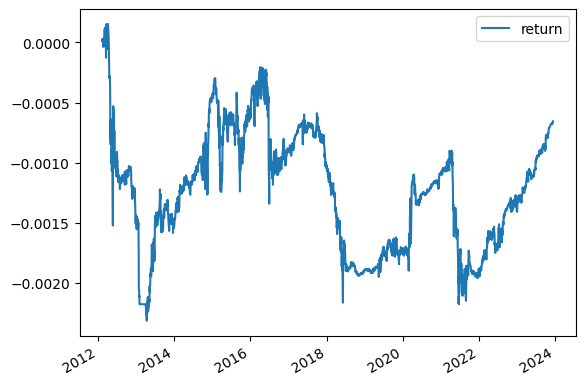

finished BRL
starting MXN
return   -0.518423
dtype: float64


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


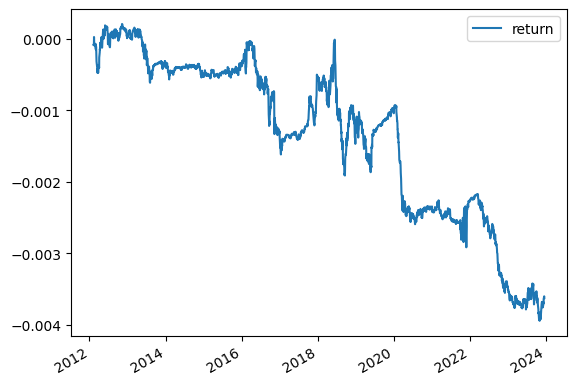

finished MXN
starting COP
return   -0.064197
dtype: float64


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


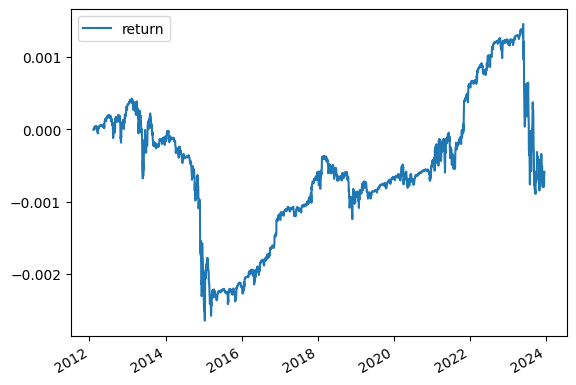

finished COP
starting CLP
return   -0.094374
dtype: float64


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


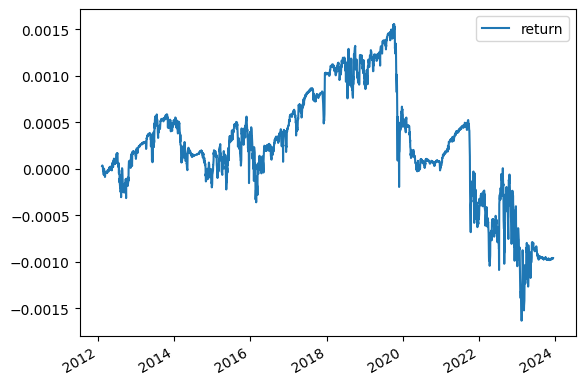

finished CLP
starting CAD
return    0.469039
dtype: float64


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


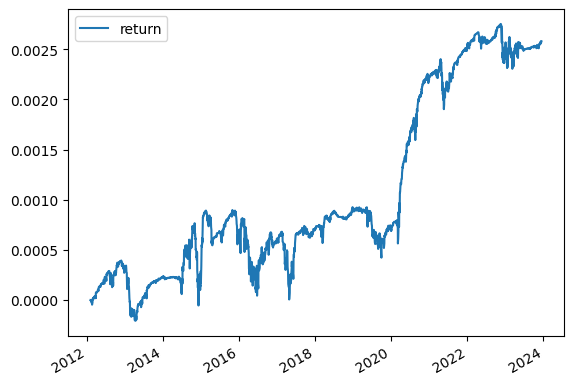

finished CAD
starting EUR
return    0.111693
dtype: float64


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


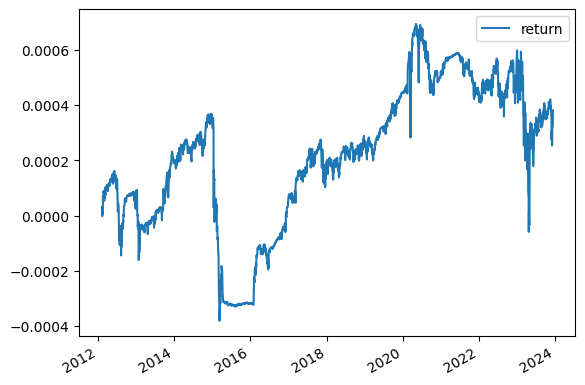

finished EUR
starting GBP
return   -0.231417
dtype: float64


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


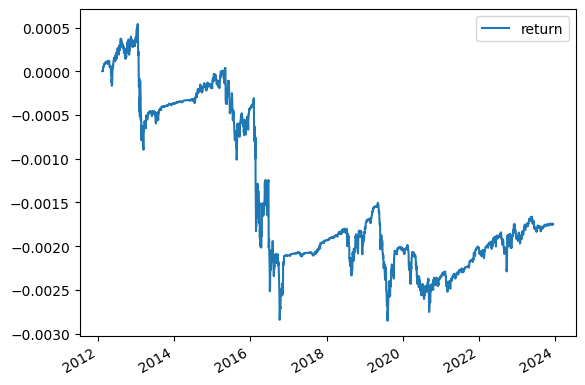

finished GBP
starting AUD
return    0.555914
dtype: float64


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


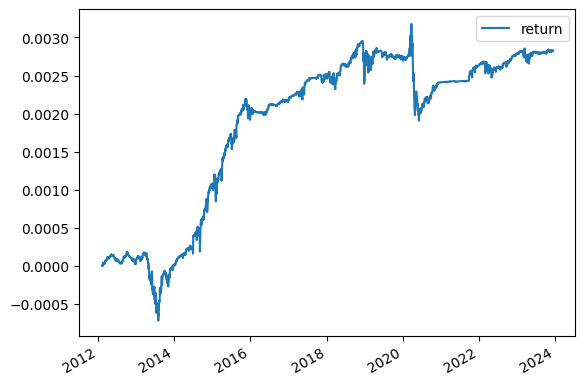

finished AUD
starting NZD
return    0.272174
dtype: float64


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


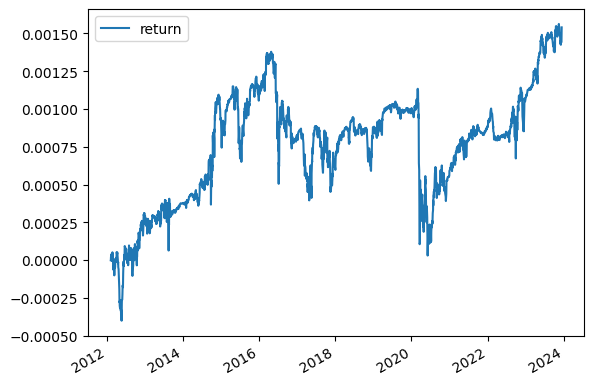

finished NZD
starting NOK
return    0.168215
dtype: float64


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


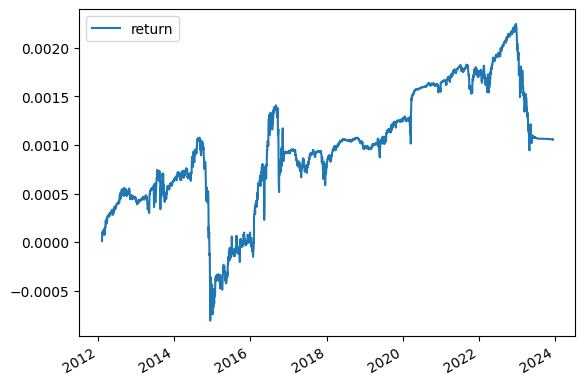

finished NOK
starting SEK
return    0.110798
dtype: float64


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


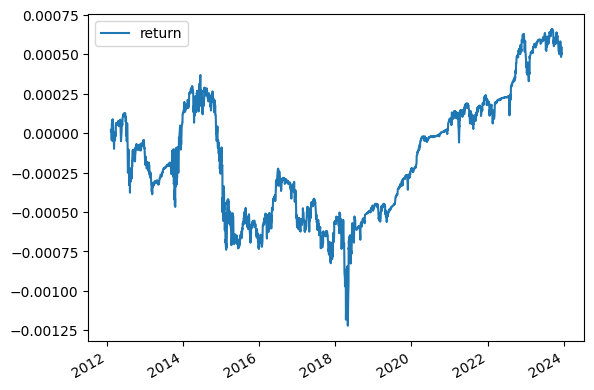

finished SEK
starting CZK
return    0.027375
dtype: float64


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


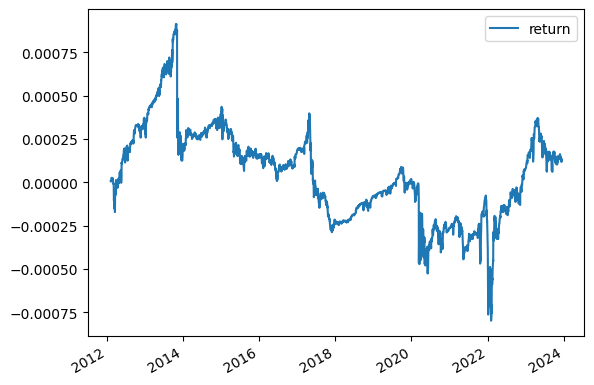

finished CZK


<AxesSubplot:>

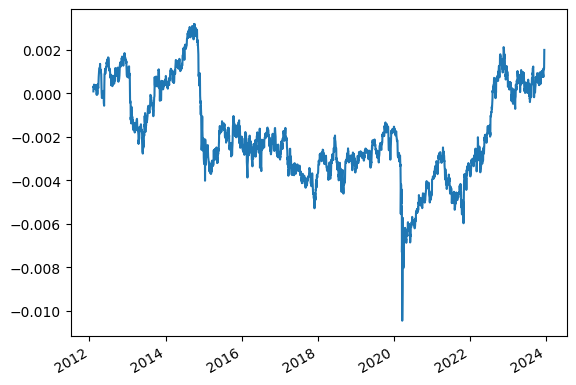

In [82]:
all_preds = []
all_rets = []

for ccy in fx_data.columns:

    print(f"starting {ccy}")

    data_ccy = (1+fx_data[[ccy]]).cumprod()

    roll = signal.RollingMeanRevPrediction(data_ccy,
                                lookback = 60,
                                length_epsiode = 300,
                                num_iter = 2000,
                                refit_freq = 200,
                                min_obs = 400)
    roll.fit_rolling()
    rets = u.quick_backtest(data_ccy,roll.prediction)
    print(np.sqrt(252)*np.mean(rets)/np.std(rets))
    rets.cumsum().plot()
    plt.show()
    print(f"finished {ccy}")
    all_rets.append(rets)
    pred_ccy = roll.prediction.copy()
    pred_ccy.columns = [ccy]
    all_preds.append(pred_ccy)

with open("pred_2.pkl","wb") as f:
    pickle.dump(pd.concat(all_preds,axis=1),f)


R = pd.concat(all_rets,axis=1).sum(axis=1)
R.cumsum().plot()

starting SGD
return   -0.00912
dtype: float64


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


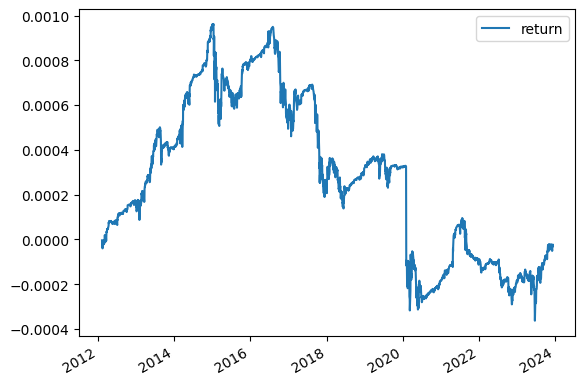

finished SGD
starting JPY
return    0.059385
dtype: float64


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


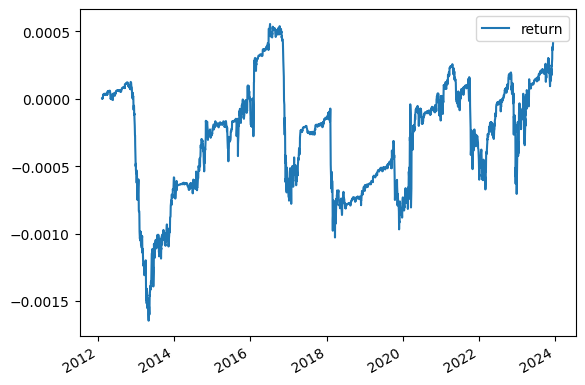

finished JPY
starting INR
return    0.457266
dtype: float64


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


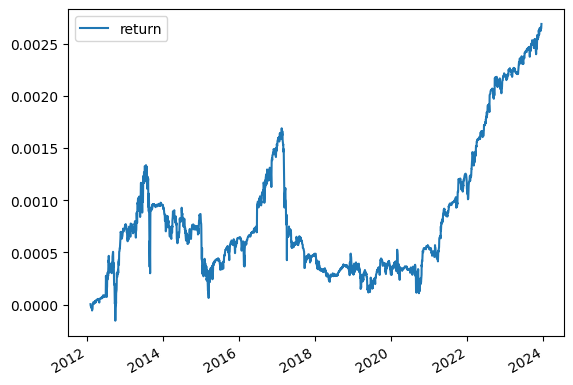

finished INR
starting THB


/Users/mehdi/Desktop/cme241/RL_Project/SignalExtractor.py:82: RuntimeWarning: invalid value encountered in scalar divide
  return (x.state["Spot"] - x.state["mu_t"])/(x.state["sigma_t"])
/Users/mehdi/Desktop/cme241/RL_Project/SignalExtractor.py:82: RuntimeWarning: invalid value encountered in scalar divide
  return (x.state["Spot"] - x.state["mu_t"])/(x.state["sigma_t"])
/Users/mehdi/Desktop/cme241/RL_Project/SignalExtractor.py:82: RuntimeWarning: invalid value encountered in scalar divide
  return (x.state["Spot"] - x.state["mu_t"])/(x.state["sigma_t"])
/Users/mehdi/Desktop/cme241/RL_Project/SignalExtractor.py:82: RuntimeWarning: invalid value encountered in scalar divide
  return (x.state["Spot"] - x.state["mu_t"])/(x.state["sigma_t"])
/Users/mehdi/Desktop/cme241/RL_Project/SignalExtractor.py:82: RuntimeWarning: invalid value encountered in scalar divide
  return (x.state["Spot"] - x.state["mu_t"])/(x.state["sigma_t"])
/Users/mehdi/Desktop/cme241/RL_Project/SignalExtractor.py:82: Run

return    0.892552
dtype: float64


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


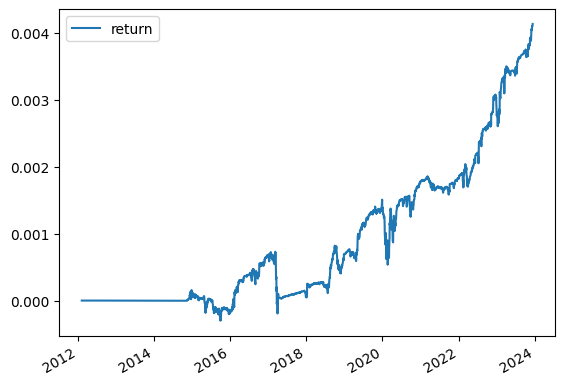

finished THB
starting ZAR
return    0.033437
dtype: float64


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


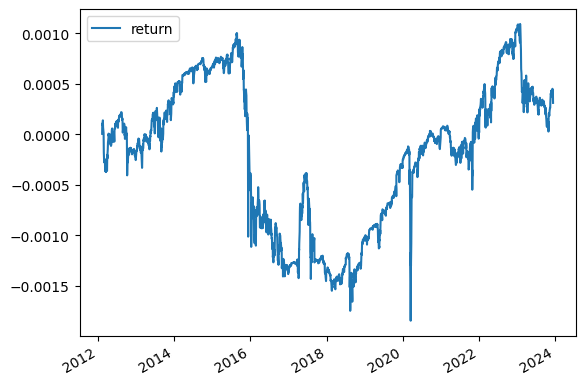

finished ZAR
starting IDR
return   -0.070358
dtype: float64


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


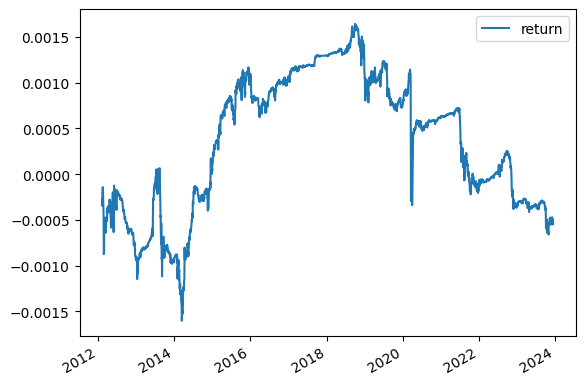

finished IDR
starting TWD
return   -0.194098
dtype: float64


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


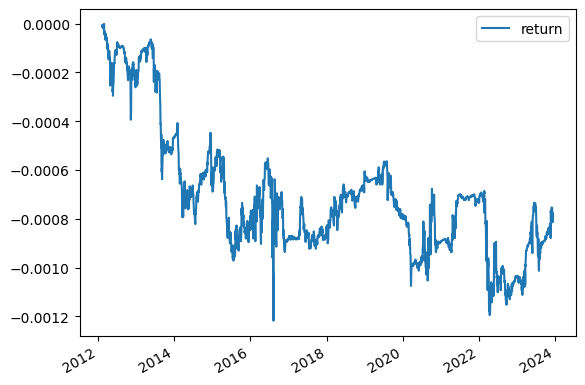

finished TWD
starting KRW
return    0.395595
dtype: float64


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


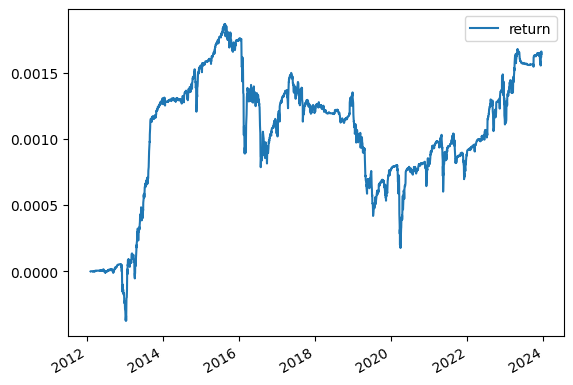

finished KRW
starting HUF
return    0.425102
dtype: float64


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


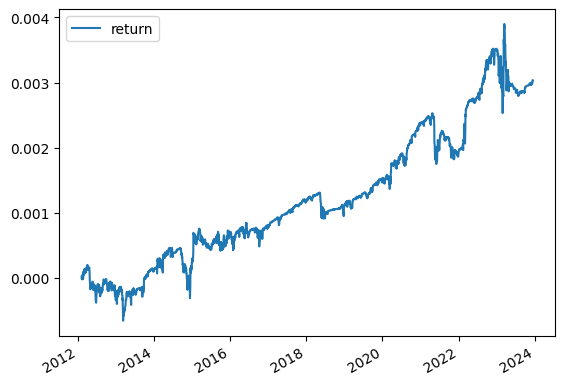

finished HUF
starting CHF
return    0.192826
dtype: float64


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


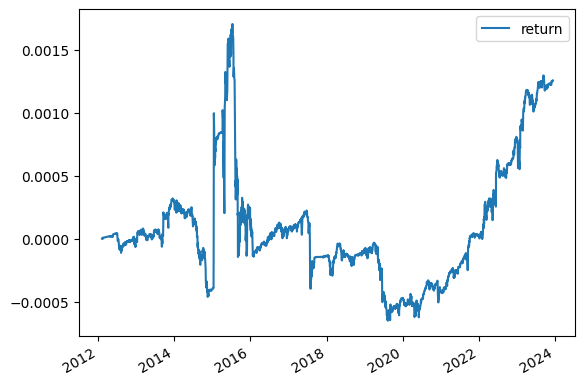

finished CHF
starting MYR


/Users/mehdi/Desktop/cme241/RL_Project/SignalExtractor.py:82: RuntimeWarning: invalid value encountered in scalar divide
  return (x.state["Spot"] - x.state["mu_t"])/(x.state["sigma_t"])
/Users/mehdi/Desktop/cme241/RL_Project/SignalExtractor.py:82: RuntimeWarning: invalid value encountered in scalar divide
  return (x.state["Spot"] - x.state["mu_t"])/(x.state["sigma_t"])
/Users/mehdi/Desktop/cme241/RL_Project/SignalExtractor.py:82: RuntimeWarning: invalid value encountered in scalar divide
  return (x.state["Spot"] - x.state["mu_t"])/(x.state["sigma_t"])
/Users/mehdi/Desktop/cme241/RL_Project/SignalExtractor.py:82: RuntimeWarning: invalid value encountered in scalar divide
  return (x.state["Spot"] - x.state["mu_t"])/(x.state["sigma_t"])
/Users/mehdi/Desktop/cme241/RL_Project/SignalExtractor.py:82: RuntimeWarning: invalid value encountered in scalar divide
  return (x.state["Spot"] - x.state["mu_t"])/(x.state["sigma_t"])
/Users/mehdi/Desktop/cme241/RL_Project/SignalExtractor.py:82: Run

return   -0.33064
dtype: float64


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


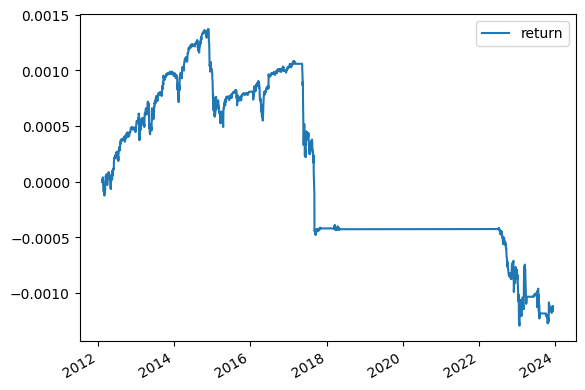

finished MYR
starting PHP
return    0.145895
dtype: float64


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


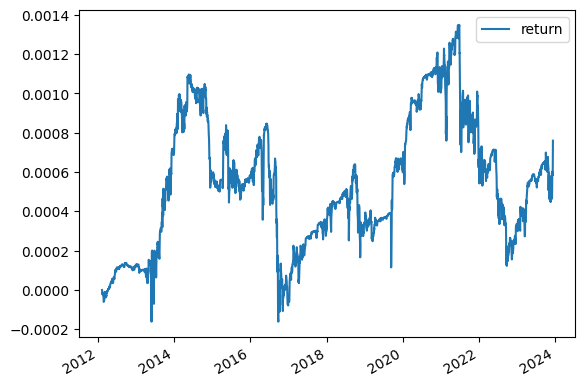

finished PHP
starting BRL
return   -0.230554
dtype: float64


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


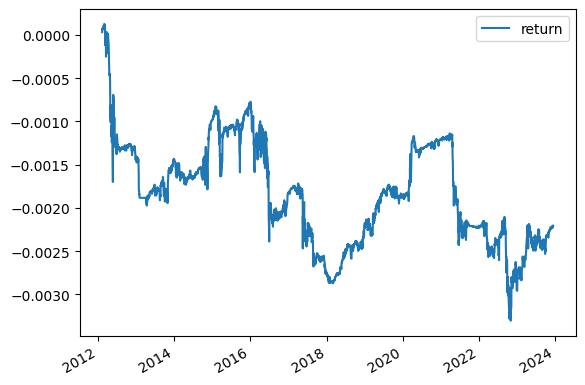

finished BRL
starting MXN
return   -0.101104
dtype: float64


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


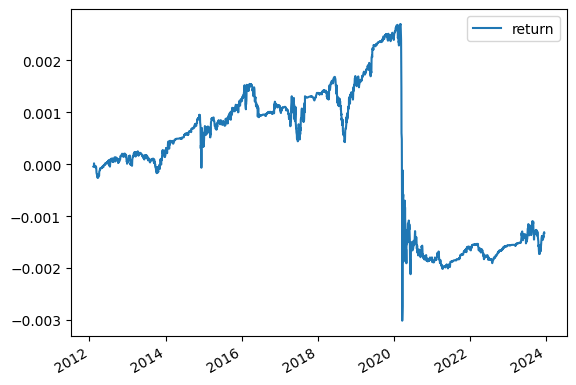

finished MXN
starting COP
return    0.155351
dtype: float64


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


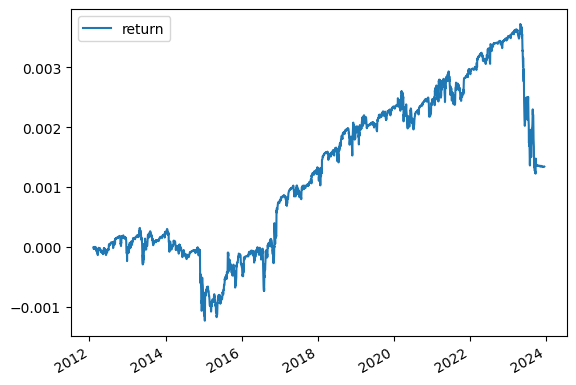

finished COP
starting CLP
return   -0.061787
dtype: float64


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


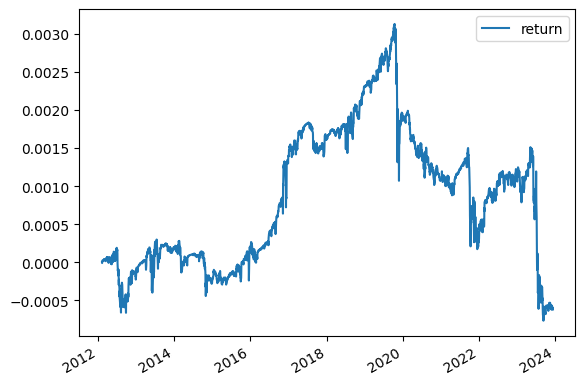

finished CLP
starting CAD
return    0.109434
dtype: float64


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


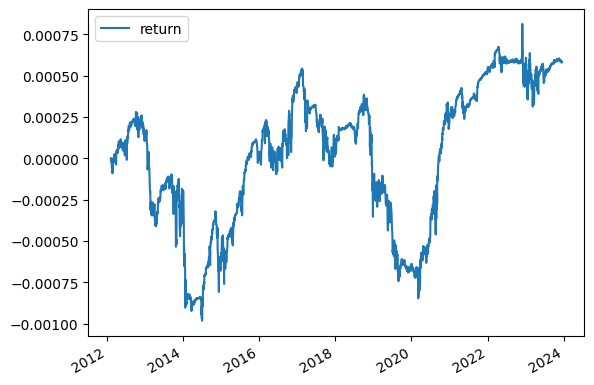

finished CAD
starting EUR
return    0.085365
dtype: float64


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


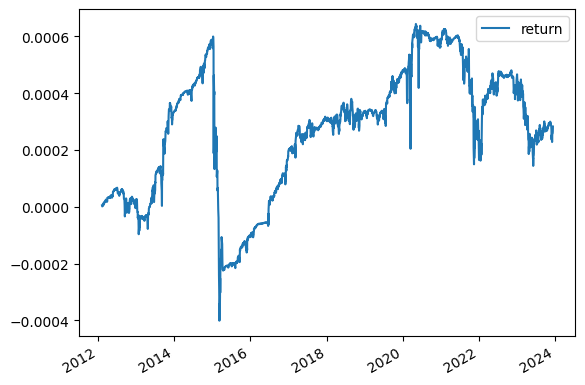

finished EUR
starting GBP
return   -0.051532
dtype: float64


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


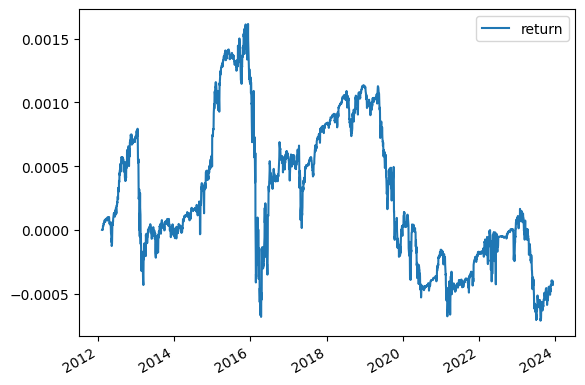

finished GBP
starting AUD
return    0.3304
dtype: float64


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


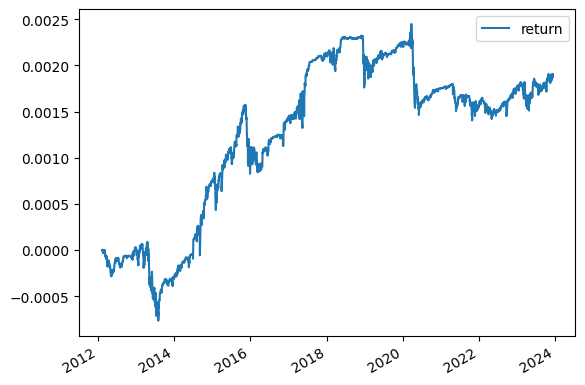

finished AUD
starting NZD
return    0.109818
dtype: float64


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


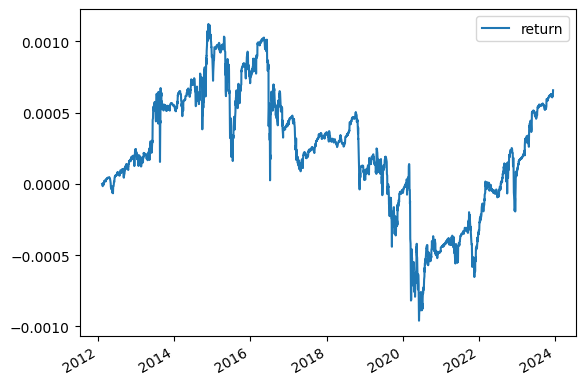

finished NZD
starting NOK
return   -0.03068
dtype: float64


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


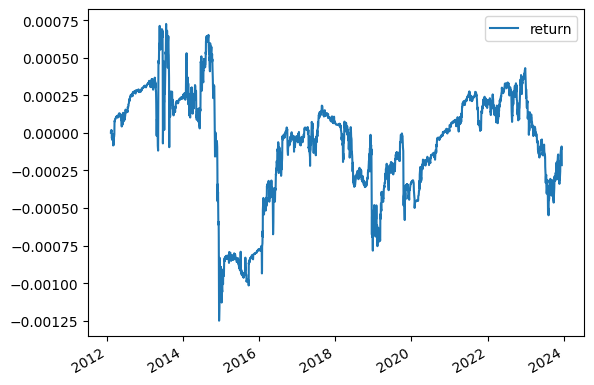

finished NOK
starting SEK
return    0.437309
dtype: float64


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


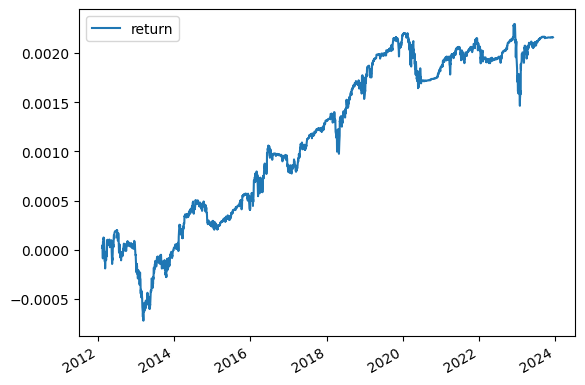

finished SEK
starting CZK
return    0.012963
dtype: float64


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


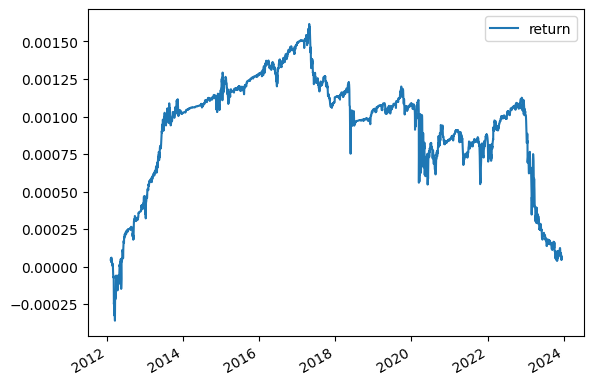

finished CZK


<AxesSubplot:>

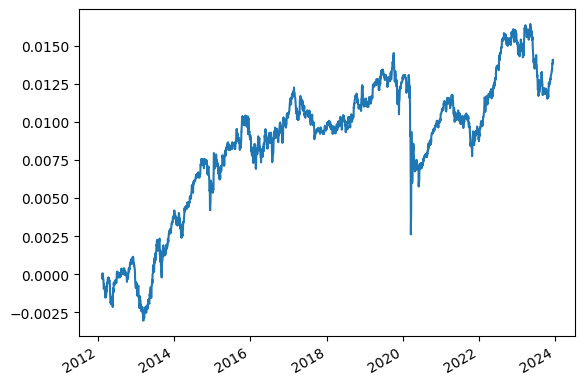

In [83]:
all_preds = []
all_rets = []

for ccy in fx_data.columns:

    print(f"starting {ccy}")

    data_ccy = (1+fx_data[[ccy]]).cumprod()

    roll = signal.RollingMeanRevPrediction(data_ccy,
                                lookback = 60,
                                length_epsiode = 150,
                                num_iter = 1000,
                                refit_freq = 100,
                                min_obs = 400)
    roll.fit_rolling()
    rets = u.quick_backtest(data_ccy,roll.prediction)
    print(np.sqrt(252)*np.mean(rets)/np.std(rets))
    rets.cumsum().plot()
    plt.show()
    print(f"finished {ccy}")
    all_rets.append(rets)
    pred_ccy = roll.prediction.copy()
    pred_ccy.columns = [ccy]
    all_preds.append(pred_ccy)

with open("pred_3.pkl","wb") as f:
    pickle.dump(pd.concat(all_preds,axis=1),f)


R = pd.concat(all_rets,axis=1).sum(axis=1)
R.cumsum().plot()

starting SGD
return    0.03784
dtype: float64


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


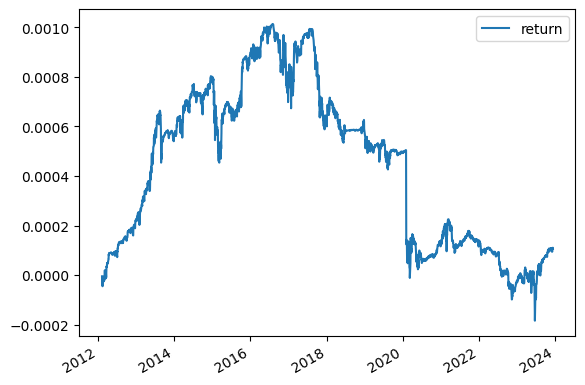

finished SGD
starting JPY
return   -0.406708
dtype: float64


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


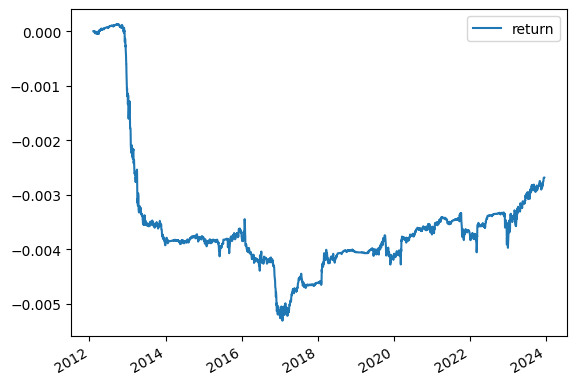

finished JPY
starting INR
return    0.15996
dtype: float64


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


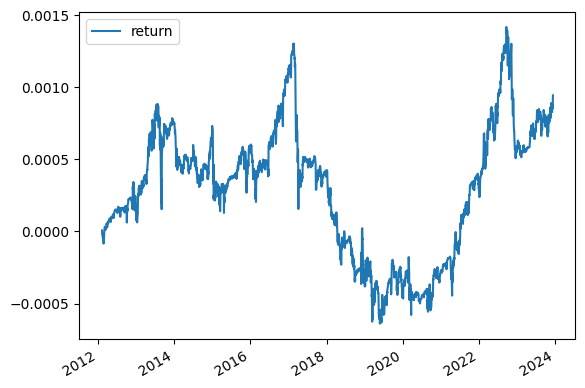

finished INR
starting THB


/Users/mehdi/Desktop/cme241/RL_Project/SignalExtractor.py:82: RuntimeWarning: invalid value encountered in scalar divide
  return (x.state["Spot"] - x.state["mu_t"])/(x.state["sigma_t"])
/Users/mehdi/Desktop/cme241/RL_Project/SignalExtractor.py:82: RuntimeWarning: invalid value encountered in scalar divide
  return (x.state["Spot"] - x.state["mu_t"])/(x.state["sigma_t"])
/Users/mehdi/Desktop/cme241/RL_Project/SignalExtractor.py:82: RuntimeWarning: invalid value encountered in scalar divide
  return (x.state["Spot"] - x.state["mu_t"])/(x.state["sigma_t"])
/Users/mehdi/Desktop/cme241/RL_Project/SignalExtractor.py:82: RuntimeWarning: invalid value encountered in scalar divide
  return (x.state["Spot"] - x.state["mu_t"])/(x.state["sigma_t"])
/Users/mehdi/Desktop/cme241/RL_Project/SignalExtractor.py:82: RuntimeWarning: invalid value encountered in scalar divide
  return (x.state["Spot"] - x.state["mu_t"])/(x.state["sigma_t"])
/Users/mehdi/Desktop/cme241/RL_Project/SignalExtractor.py:82: Run

return    0.303814
dtype: float64


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


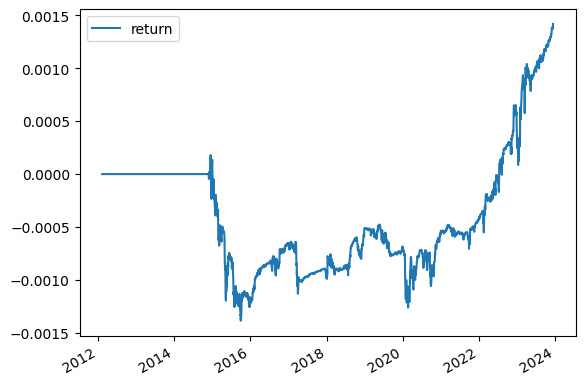

finished THB
starting ZAR
return    0.161789
dtype: float64


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


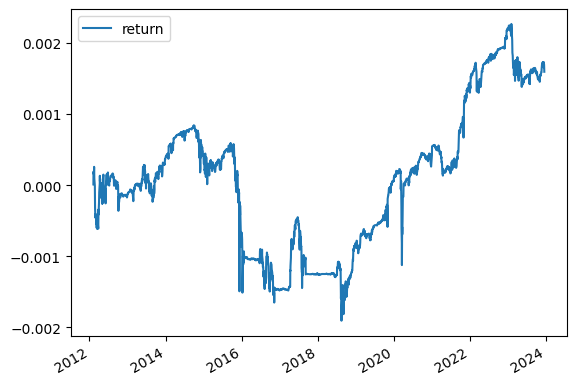

finished ZAR
starting IDR
return    0.023374
dtype: float64


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


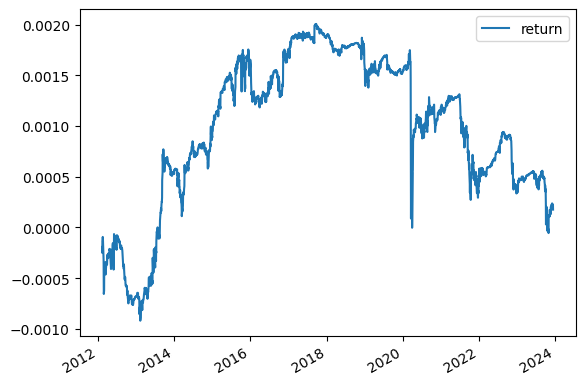

finished IDR
starting TWD
return   -0.35632
dtype: float64


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


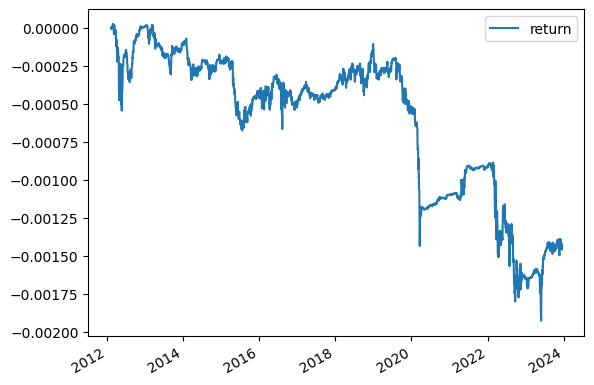

finished TWD
starting KRW
return    0.200156
dtype: float64


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


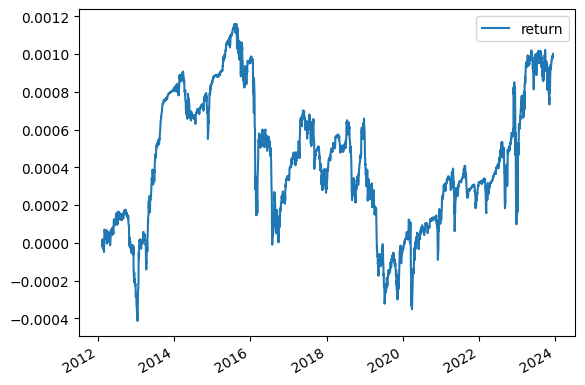

finished KRW
starting HUF
return    0.308236
dtype: float64


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


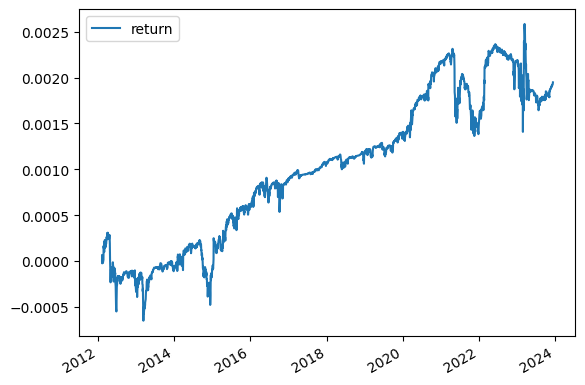

finished HUF
starting CHF
return    0.235425
dtype: float64


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


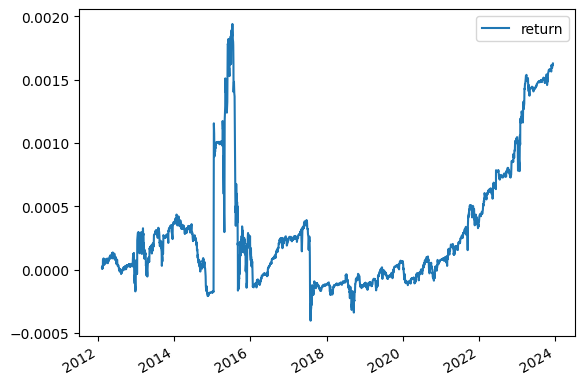

finished CHF
starting MYR


/Users/mehdi/Desktop/cme241/RL_Project/SignalExtractor.py:82: RuntimeWarning: invalid value encountered in scalar divide
  return (x.state["Spot"] - x.state["mu_t"])/(x.state["sigma_t"])
/Users/mehdi/Desktop/cme241/RL_Project/SignalExtractor.py:82: RuntimeWarning: invalid value encountered in scalar divide
  return (x.state["Spot"] - x.state["mu_t"])/(x.state["sigma_t"])
/Users/mehdi/Desktop/cme241/RL_Project/SignalExtractor.py:82: RuntimeWarning: invalid value encountered in scalar divide
  return (x.state["Spot"] - x.state["mu_t"])/(x.state["sigma_t"])
/Users/mehdi/Desktop/cme241/RL_Project/SignalExtractor.py:82: RuntimeWarning: invalid value encountered in scalar divide
  return (x.state["Spot"] - x.state["mu_t"])/(x.state["sigma_t"])
/Users/mehdi/Desktop/cme241/RL_Project/SignalExtractor.py:82: RuntimeWarning: invalid value encountered in scalar divide
  return (x.state["Spot"] - x.state["mu_t"])/(x.state["sigma_t"])
/Users/mehdi/Desktop/cme241/RL_Project/SignalExtractor.py:82: Run

return   -0.142078
dtype: float64


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


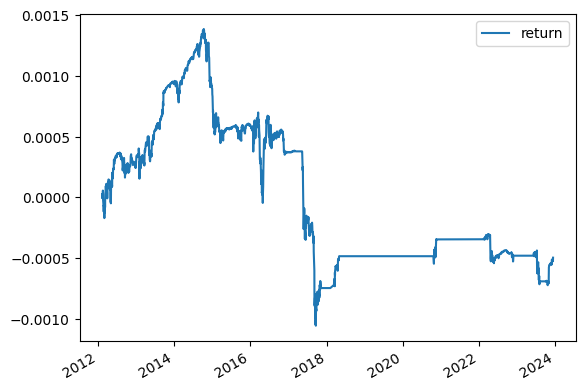

finished MYR
starting PHP
return    0.492375
dtype: float64


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


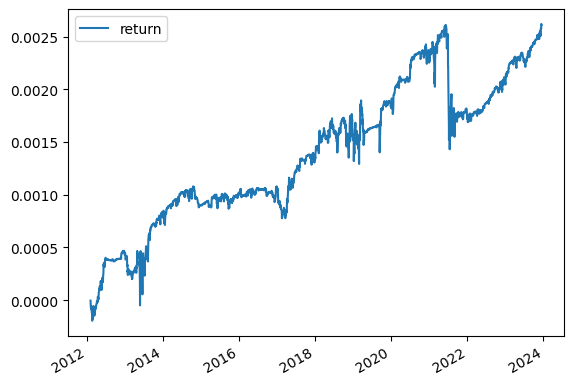

finished PHP
starting BRL
return   -0.148424
dtype: float64


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


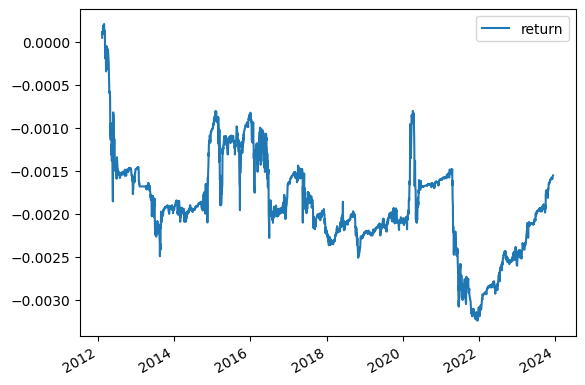

finished BRL
starting MXN
return   -0.378769
dtype: float64


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


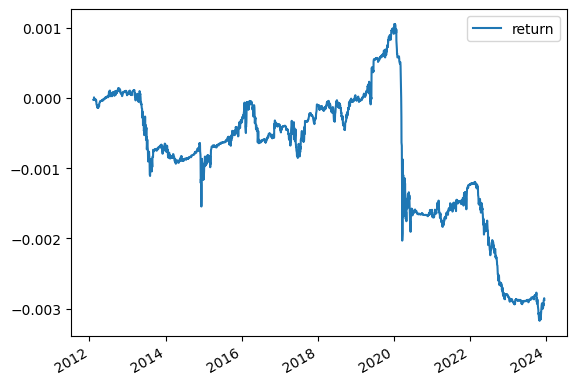

finished MXN
starting COP
return    0.114143
dtype: float64


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


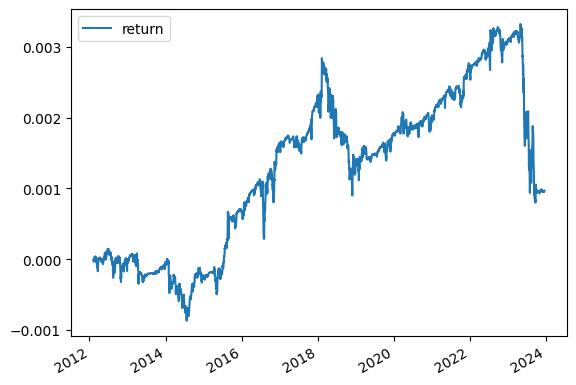

finished COP
starting CLP
return    0.278973
dtype: float64


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


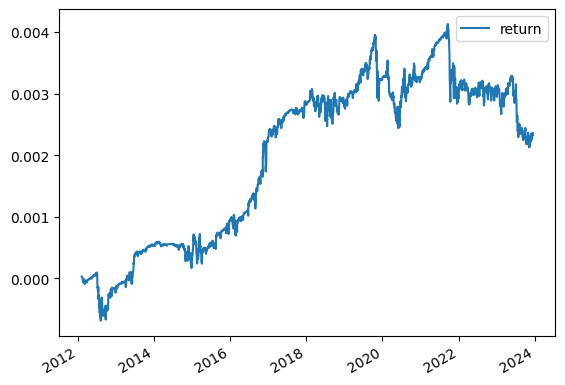

finished CLP
starting CAD
return    0.146343
dtype: float64


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


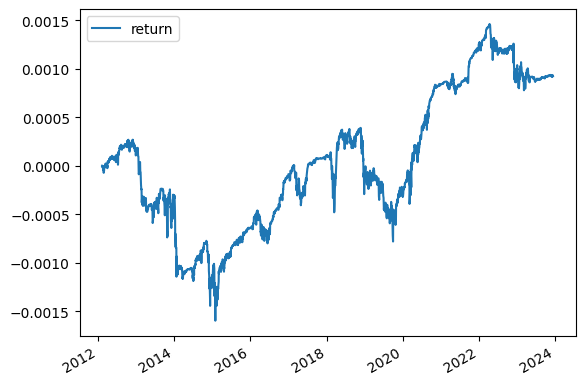

finished CAD
starting EUR
return    0.078233
dtype: float64


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


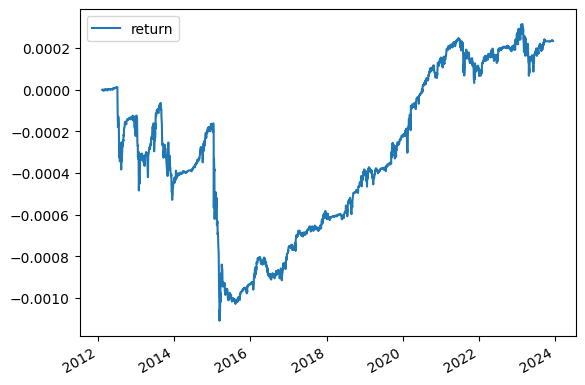

finished EUR
starting GBP
return   -0.010875
dtype: float64


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


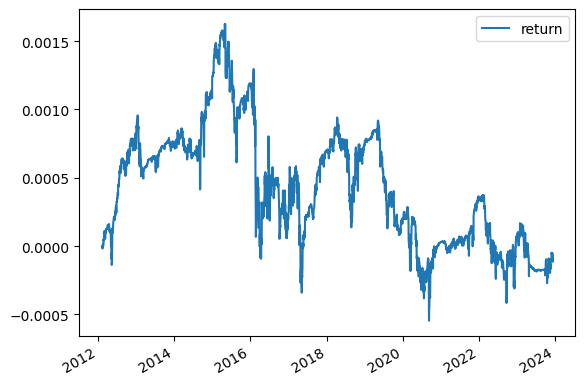

finished GBP
starting AUD
return    0.023065
dtype: float64


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


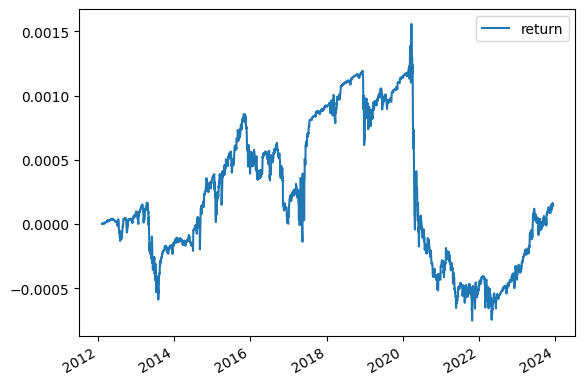

finished AUD
starting NZD
return    0.187808
dtype: float64


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


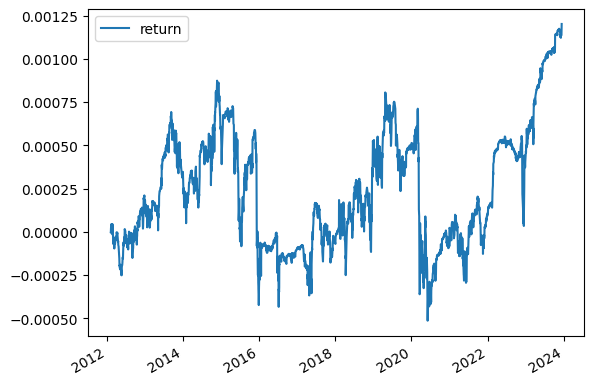

finished NZD
starting NOK
return    0.128404
dtype: float64


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


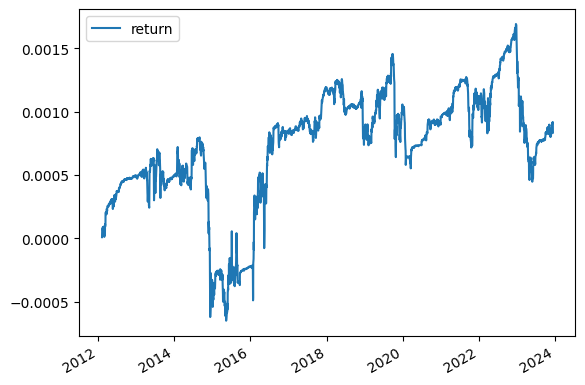

finished NOK
starting SEK
return    0.40209
dtype: float64


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


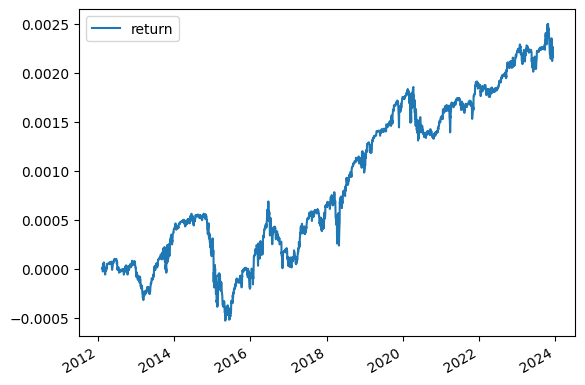

finished SEK
starting CZK
return    0.028483
dtype: float64


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


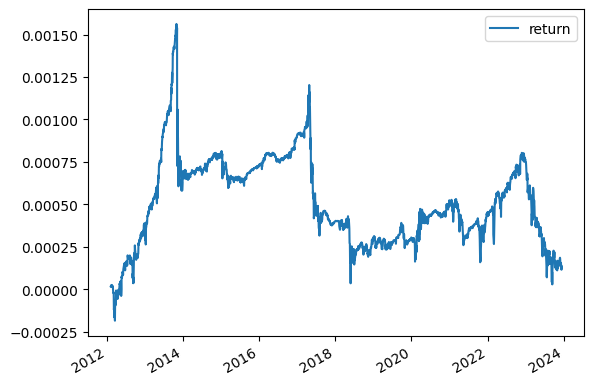

finished CZK


<AxesSubplot:>

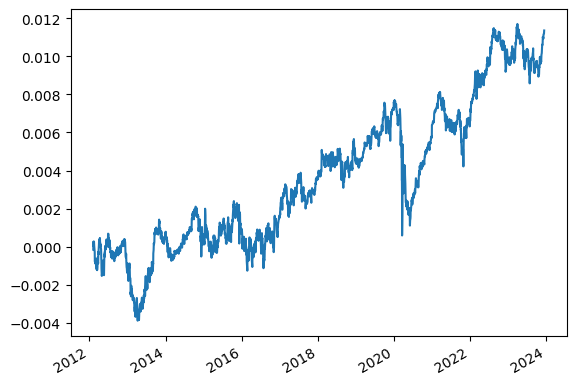

In [84]:
all_preds = []
all_rets = []

for ccy in fx_data.columns:

    print(f"starting {ccy}")

    data_ccy = (1+fx_data[[ccy]]).cumprod()

    roll = signal.RollingMeanRevPrediction(data_ccy,
                                lookback = 60,
                                length_epsiode = 150,
                                num_iter = 1000,
                                refit_freq = 100,
                                min_obs = 400)
    roll.fit_rolling()
    rets = u.quick_backtest(data_ccy,roll.prediction)
    print(np.sqrt(252)*np.mean(rets)/np.std(rets))
    rets.cumsum().plot()
    plt.show()
    print(f"finished {ccy}")
    all_rets.append(rets)
    pred_ccy = roll.prediction.copy()
    pred_ccy.columns = [ccy]
    all_preds.append(pred_ccy)

with open("pred_4.pkl","wb") as f:
    pickle.dump(pd.concat(all_preds,axis=1),f)


R = pd.concat(all_rets,axis=1).sum(axis=1)
R.cumsum().plot()